In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 

df = pd.read_csv('sales data-set.csv')
 

x = df.iloc[:, :-1]
y = df.iloc[:, -1]
 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=0)


train_dataset = x_train.join(y_train)
test_dataset = x_test.join(y_test)

train_dataset.to_csv(r'Sales_Train.csv', index = False)
test_dataset.to_csv(r'Sales_Test.csv', index = False)

In [3]:
train_df = pd.read_csv('Sales_Train.csv')
test_df = pd.read_csv('Sales_Test.csv')
stores_df = pd.read_csv('stores data-set.csv')
features_df = pd.read_csv('Features data set.csv')

In [4]:
alltest_dataset = test_df.merge(stores_df, how='left').merge(features_df, how='left')
alldataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')

In [5]:
alldataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,24,74,01-10-2010,19305.26,False,B,119557,69.31,2.717,NaN,NaN,NaN,NaN,NaN,136.629757,8.572
1,43,8,22-07-2011,33905.86,False,A,196321,74.11,3.545,NaN,NaN,NaN,NaN,NaN,193.512037,6.901
2,44,42,12-08-2011,223.30,False,C,39690,85.61,3.794,NaN,NaN,NaN,NaN,NaN,129.201581,8.257
3,18,72,20-07-2012,28398.78,False,B,57197,68.43,3.585,1115.42,105.35,4.69,196.54,948.69,197.929038,6.061
4,17,10,28-01-2011,10030.71,False,B,123737,19.61,3.402,NaN,NaN,NaN,NaN,NaN,133.105968,7.771


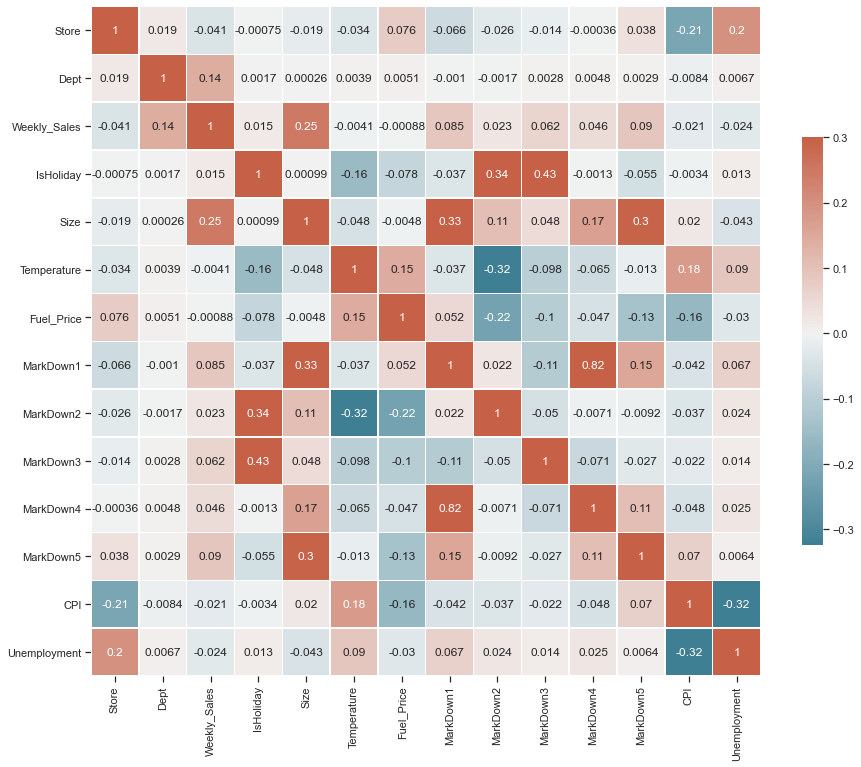

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plot


corr = alldataset.corr()
f, ax = plot.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plot.show()

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [9]:
alldataset.isnull().mean() * 100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.275260
MarkDown2       73.373213
MarkDown3       67.450142
MarkDown4       67.573087
MarkDown5       64.095147
CPI              0.000000
Unemployment     0.000000
dtype: float64

In [10]:
alldataset['MarkDown1'] = alldataset['MarkDown1'].fillna(0)
alldataset['MarkDown2'] = alldataset['MarkDown2'].fillna(0)
alldataset['MarkDown3'] = alldataset['MarkDown3'].fillna(0)
alldataset['MarkDown4'] = alldataset['MarkDown4'].fillna(0)
alldataset['MarkDown5'] = alldataset['MarkDown5'].fillna(0)

In [11]:
alldataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,24,74,01-10-2010,19305.26,False,B,119557,69.31,2.717,0.00,0.00,0.00,0.00,0.00,136.629757,8.572
1,43,8,22-07-2011,33905.86,False,A,196321,74.11,3.545,0.00,0.00,0.00,0.00,0.00,193.512037,6.901
2,44,42,12-08-2011,223.30,False,C,39690,85.61,3.794,0.00,0.00,0.00,0.00,0.00,129.201581,8.257
3,18,72,20-07-2012,28398.78,False,B,57197,68.43,3.585,1115.42,105.35,4.69,196.54,948.69,197.929038,6.061
4,17,10,28-01-2011,10030.71,False,B,123737,19.61,3.402,0.00,0.00,0.00,0.00,0.00,133.105968,7.771


In [12]:
alldataset['Year'] = pd.to_datetime(alldataset['Date']).dt.year
alldataset['Month'] = pd.to_datetime(alldataset['Date']).dt.month
alldataset['Week'] = pd.to_datetime(alldataset['Date']).dt.isocalendar().week

In [13]:
feat_sto = features_df.merge(stores_df, how='inner', on='Store')

In [14]:
feat_sto.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,05-02-2010,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False,C,39910
1,1,12-02-2010,33.16,2.671,NaN,NaN,NaN,NaN,NaN,126.496258,8.119,True,C,39910
2,1,19-02-2010,35.70,2.654,NaN,NaN,NaN,NaN,NaN,126.526286,8.119,False,C,39910
3,1,26-02-2010,29.98,2.667,NaN,NaN,NaN,NaN,NaN,126.552286,8.119,False,C,39910
4,1,05-03-2010,40.65,2.681,NaN,NaN,NaN,NaN,NaN,126.578286,8.119,False,C,39910


In [15]:
pd.DataFrame(feat_sto.dtypes, columns=['Type'])

,Type
Store,int64
Date,object
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64
MarkDown5,float64
CPI,float64


In [16]:
train_detail = train_df.merge(feat_sto, 
                           how='inner',
                           on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept',
                                                                            'Date']).reset_index(drop=True)

In [17]:
test_detail = test_df.merge(feat_sto, 
                           how='inner',
                           on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept',
                                                                            'Date']).reset_index(drop=True)

In [24]:
test_detail['Year'] = pd.to_datetime(test_detail['Date']).dt.year
test_detail['Month'] = pd.to_datetime(test_detail['Date']).dt.month
test_detail['Week'] = pd.to_datetime(test_detail['Date']).dt.isocalendar().week

In [20]:
train_detail['Year'] = pd.to_datetime(train_detail['Date']).dt.year
train_detail['Month'] = pd.to_datetime(train_detail['Date']).dt.month
train_detail['Week'] = pd.to_datetime(train_detail['Date']).dt.isocalendar().week

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

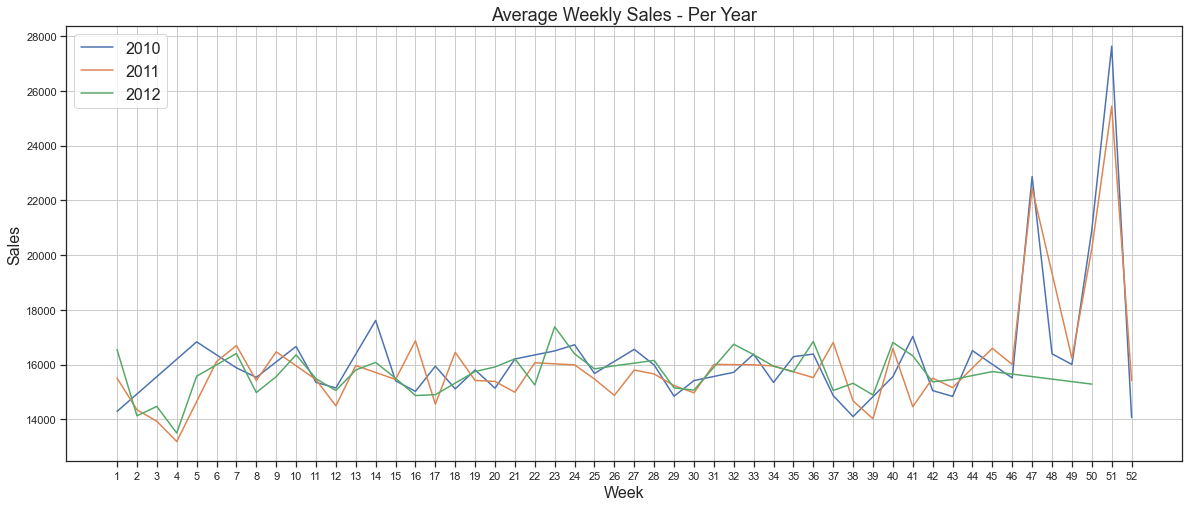

In [21]:
weekly_sales_2010 = train_detail[train_detail.Year==2010]['Weekly_Sales'].groupby(train_detail['Week']).mean()
weekly_sales_2011 = train_detail[train_detail.Year==2011]['Weekly_Sales'].groupby(train_detail['Week']).mean()
weekly_sales_2012 = train_detail[train_detail.Year==2012]['Weekly_Sales'].groupby(train_detail['Week']).mean()
plot.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plot.grid()
plot.xticks(np.arange(1, 53, step=1))
plot.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plot.title('Average Weekly Sales - Per Year', fontsize=18)
plot.ylabel('Sales', fontsize=16)
plot.xlabel('Week', fontsize=16)
plot.show()

In [25]:
train_detail.loc[(train_detail.Year==2010) & (train_detail.Week==13), 'IsHoliday'] = True
train_detail.loc[(train_detail.Year==2011) & (train_detail.Week==16), 'IsHoliday'] = True
train_detail.loc[(train_detail.Year==2012) & (train_detail.Week==14), 'IsHoliday'] = True
test_detail.loc[(test_detail.Year==2013) & (test_detail.Week==13), 'IsHoliday'] = True

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


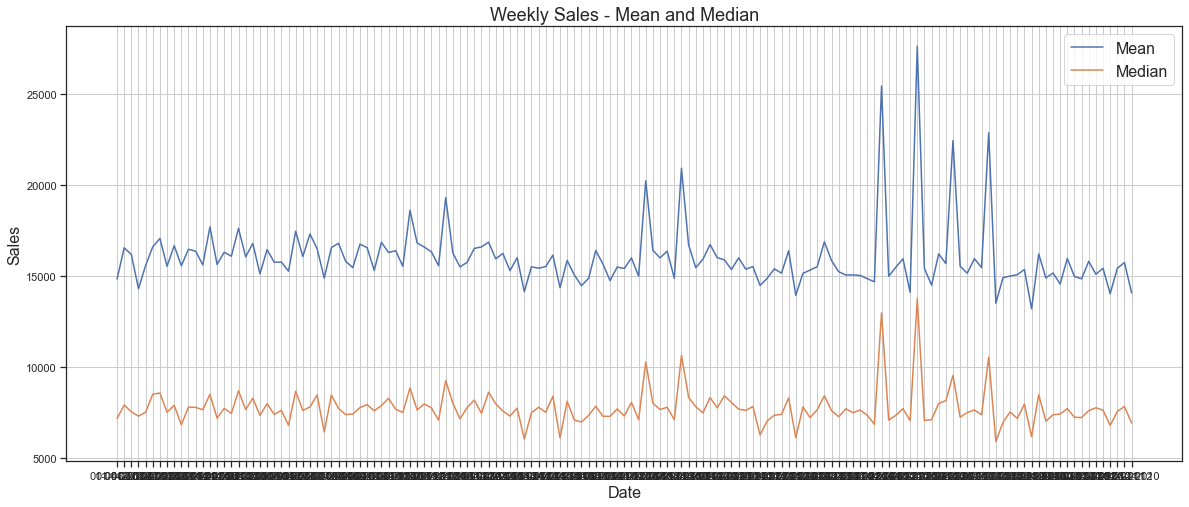

In [26]:
weekly_sales_mean = train_detail['Weekly_Sales'].groupby(train_detail['Date']).mean()
weekly_sales_median = train_detail['Weekly_Sales'].groupby(train_detail['Date']).median()
plot.figure(figsize=(20,8))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values)
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values)
plot.grid()
plot.legend(['Mean', 'Median'], loc='best', fontsize=16)
plot.title('Weekly Sales - Mean and Median', fontsize=18)
plot.ylabel('Sales', fontsize=16)
plot.xlabel('Date', fontsize=16)
plot.show()

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


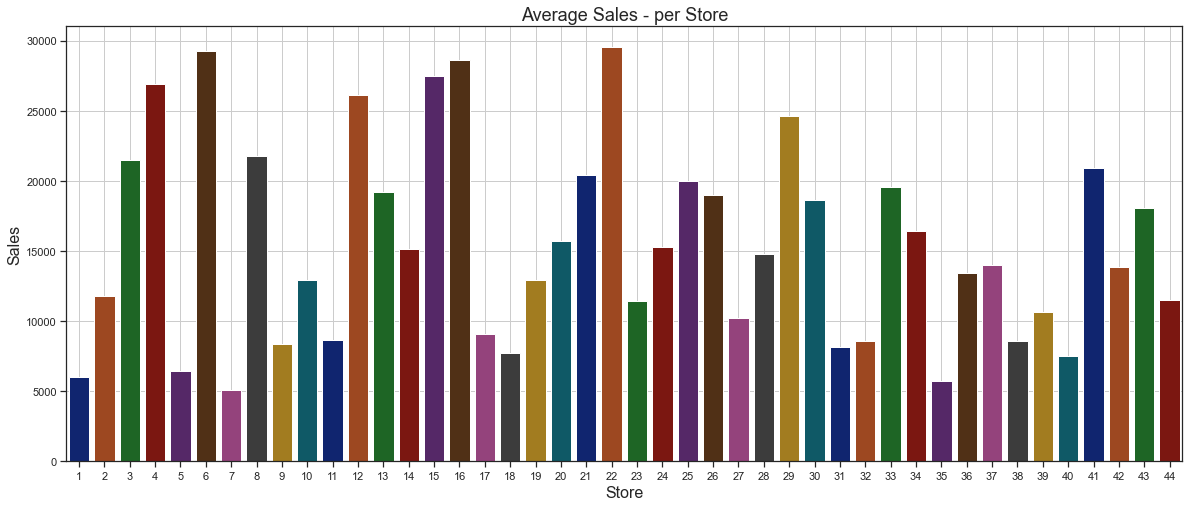

In [27]:
weekly_sales = train_detail['Weekly_Sales'].groupby(train_detail['Store']).mean()
plot.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plot.grid()
plot.title('Average Sales - per Store', fontsize=18)
plot.ylabel('Sales', fontsize=16)
plot.xlabel('Store', fontsize=16)
plot.show()

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


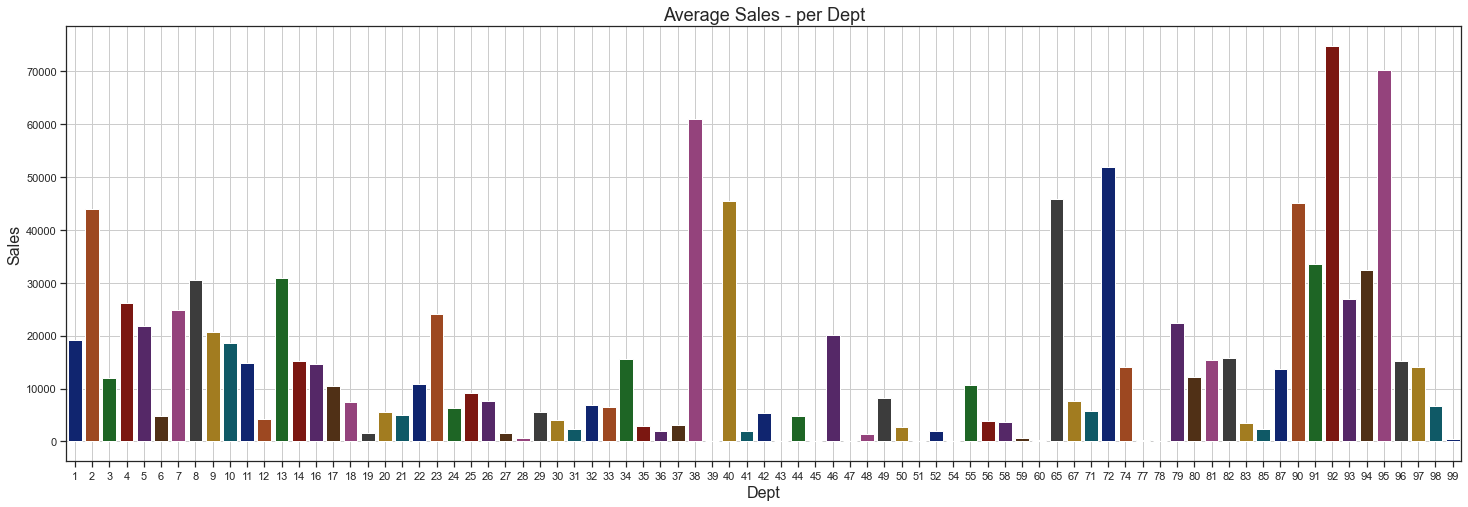

In [28]:
weekly_sales = train_detail['Weekly_Sales'].groupby(train_detail['Dept']).mean()
plot.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plot.grid()
plot.title('Average Sales - per Dept', fontsize=18)
plot.ylabel('Sales', fontsize=16)
plot.xlabel('Dept', fontsize=16)
plot.show()

<ipython-input-30-e23c0e1862fc>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


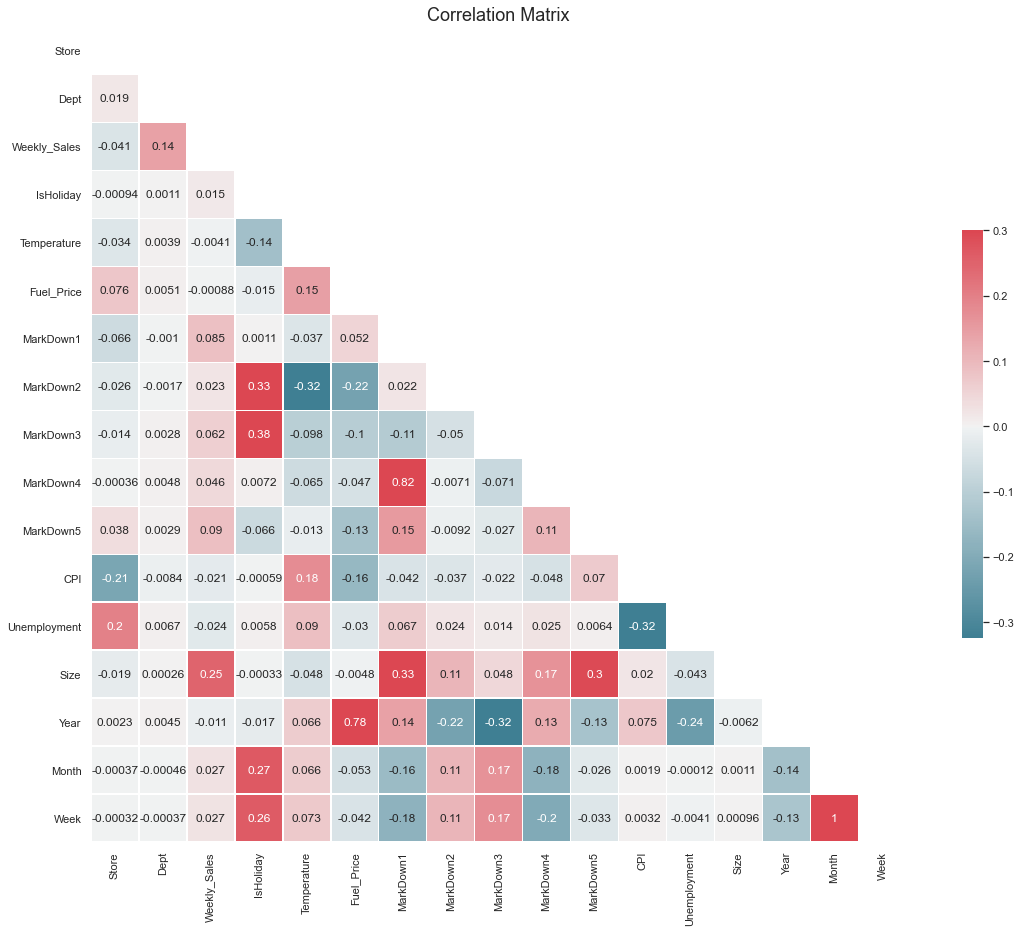

In [30]:
sns.set(style="white")

corr = train_detail.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plot.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plot.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plot.show()

In [91]:
import matplotlib
from matplotlib import rcdefaults
rcdefaults()
from scipy.special import boxcox1p
from scipy import stats

In [72]:
def make_discrete_plot(feature):
    fig = plot.figure(figsize=(20,8))
    gs = matplotlib.gridspec.GridSpec(1,2)
    sns.boxplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,0]))
    plot.ylabel('Sales', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    sns.stripplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,1]))
    plot.ylabel('Sales', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    fig.show()

In [73]:
def make_discrete_plot1(feature):
    fig = plot.figure(figsize=(20,8))
    gs = matplotlib.gridspec.GridSpec(1,2)
    sns.boxplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,0]))
    plot.ylabel('MarkDown1', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    sns.stripplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,1]))
    plot.ylabel('MarkDown1', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    fig.show()

In [74]:
def make_discrete_plot2(feature):
    fig = plot.figure(figsize=(20,8))
    gs = matplotlib.gridspec.GridSpec(1,2)
    sns.boxplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,0]))
    plot.ylabel('MarkDown2', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    sns.stripplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,1]))
    plot.ylabel('MarkDown2', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    fig.show()

In [75]:
def make_discrete_plot3(feature):
    fig = plot.figure(figsize=(20,8))
    gs = matplotlib.gridspec.GridSpec(1,2)
    sns.boxplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,0]))
    plot.ylabel('MarkDown3', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    sns.stripplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,1]))
    plot.ylabel('MarkDown3', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    fig.show()

In [76]:
def make_discrete_plot4(feature):
    fig = plot.figure(figsize=(20,8))
    gs = matplotlib.gridspec.GridSpec(1,2)
    sns.boxplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,0]))
    plot.ylabel('MarkDown4', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    sns.stripplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,1]))
    plot.ylabel('MarkDown4', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    fig.show()

In [77]:
def make_discrete_plot5(feature):
    fig = plot.figure(figsize=(20,8))
    gs = matplotlib.gridspec.GridSpec(1,2)
    sns.boxplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,0]))
    plot.ylabel('MarkDown5', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    sns.stripplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,1]))
    plot.ylabel('MarkDown5', fontsize=16)
    plot.xlabel(feature, fontsize=16)
    fig.show()

In [92]:
def make_continuous_plot(feature):
    
    fig = plot.figure(figsize=(18,15))
    gs = matplotlib.gridspec.GridSpec(2,2)
    
    j = sns.scatterplot(y=train_detail['Weekly_Sales'], 
                        x=boxcox1p(train_detail[feature], 0.15), ax=fig.add_subplot(gs[0,1]), palette = 'blue')

    plot.title('BoxCox 0.15\n' + 'Corr: ' + str(np.round(train_detail['Weekly_Sales'].corr(boxcox1p(train_detail[feature], 0.15)),2)) +
              ', Skew: ' + str(np.round(stats.skew(boxcox1p(train_detail[feature], 0.15), nan_policy='omit'),2)))
    
    j = sns.scatterplot(y=train_detail['Weekly_Sales'], 
                        x=boxcox1p(train_detail[feature], 0.25), ax=fig.add_subplot(gs[1,0]), palette = 'blue')

    plot.title('BoxCox 0.25\n' + 'Corr: ' + str(np.round(train_detail['Weekly_Sales'].corr(boxcox1p(train_detail[feature], 0.25)),2)) +
              ', Skew: ' + str(np.round(stats.skew(boxcox1p(train_detail[feature], 0.25), nan_policy='omit'),2)))
    
    j = sns.distplot(train_detail[feature], ax=fig.add_subplot(gs[1,1]), color = 'green')

    plot.title('Distribution\n')
    
    j = sns.scatterplot(y=train_detail['Weekly_Sales'], 
                        x=train_detail[feature], ax=fig.add_subplot(gs[0,0]), color = 'red')

    plot.title('Linear\n' + 'Corr: ' + str(np.round(train_detail['Weekly_Sales'].corr(train_detail[feature]),2)) + ', Skew: ' + 
               str(np.round(stats.skew(train_detail[feature], nan_policy='omit'),2)))
    
    fig.show()

<ipython-input-73-426dd286a250>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


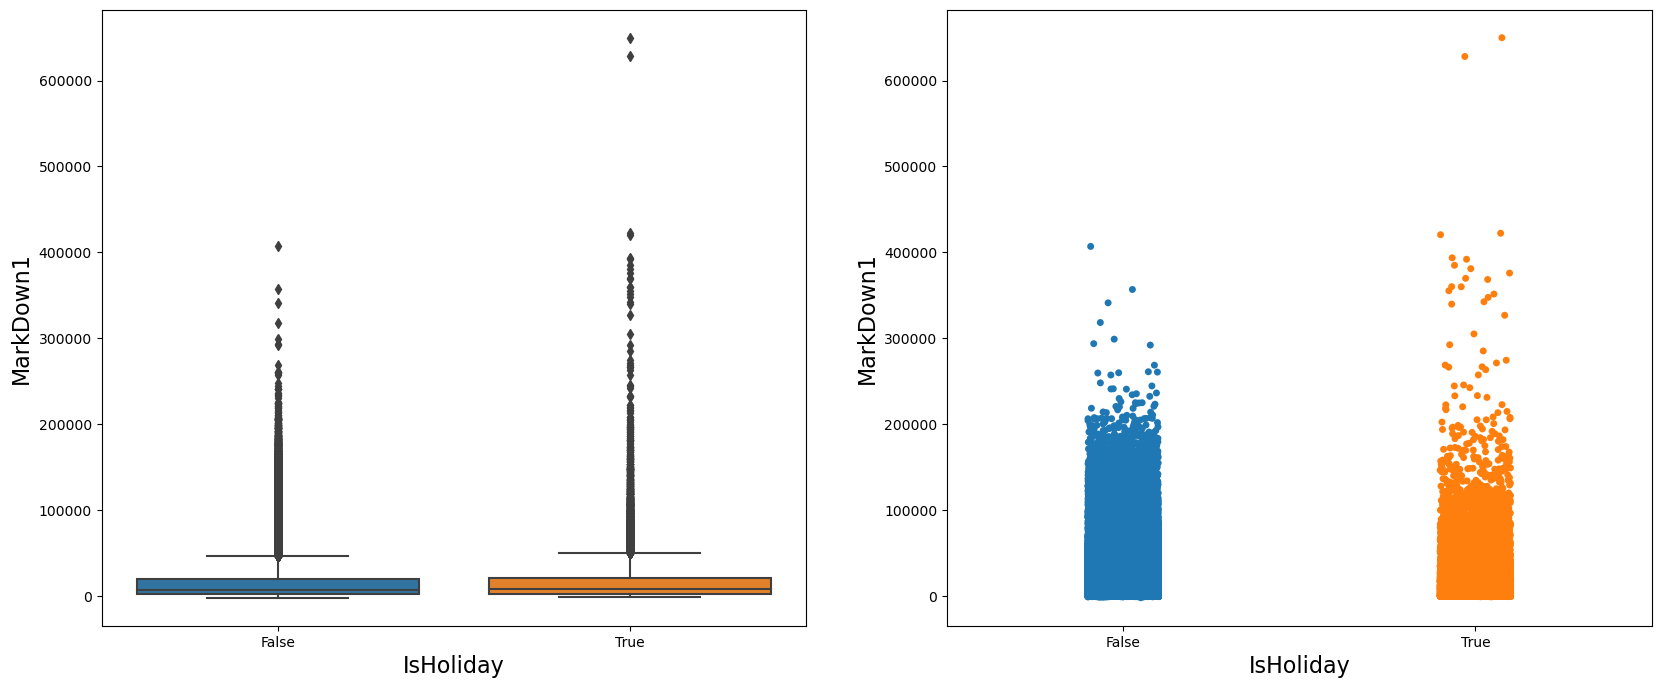

In [79]:
make_discrete_plot1('IsHoliday')

<ipython-input-74-b5b255a4cab2>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


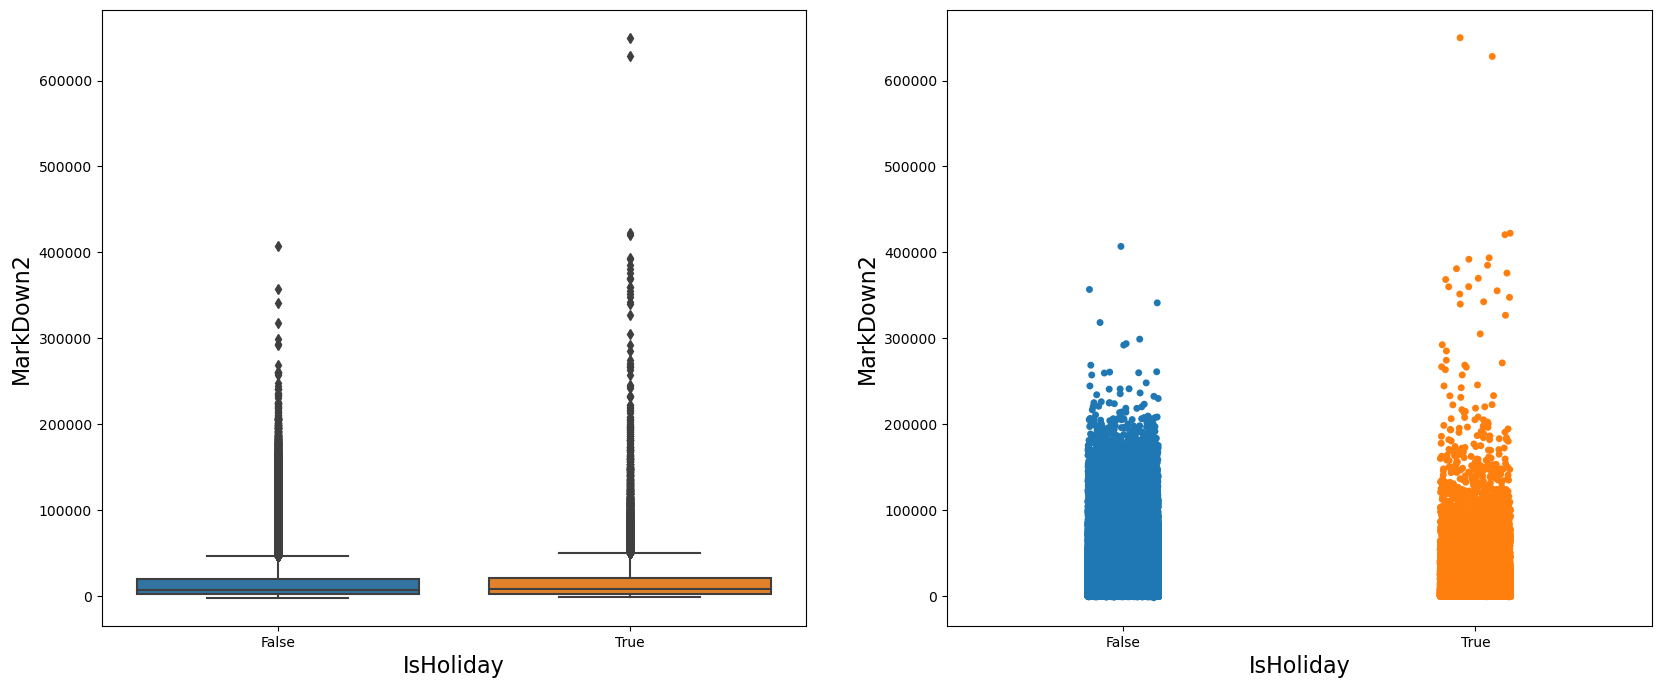

In [80]:
make_discrete_plot2('IsHoliday')

<ipython-input-75-3a720a325a22>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


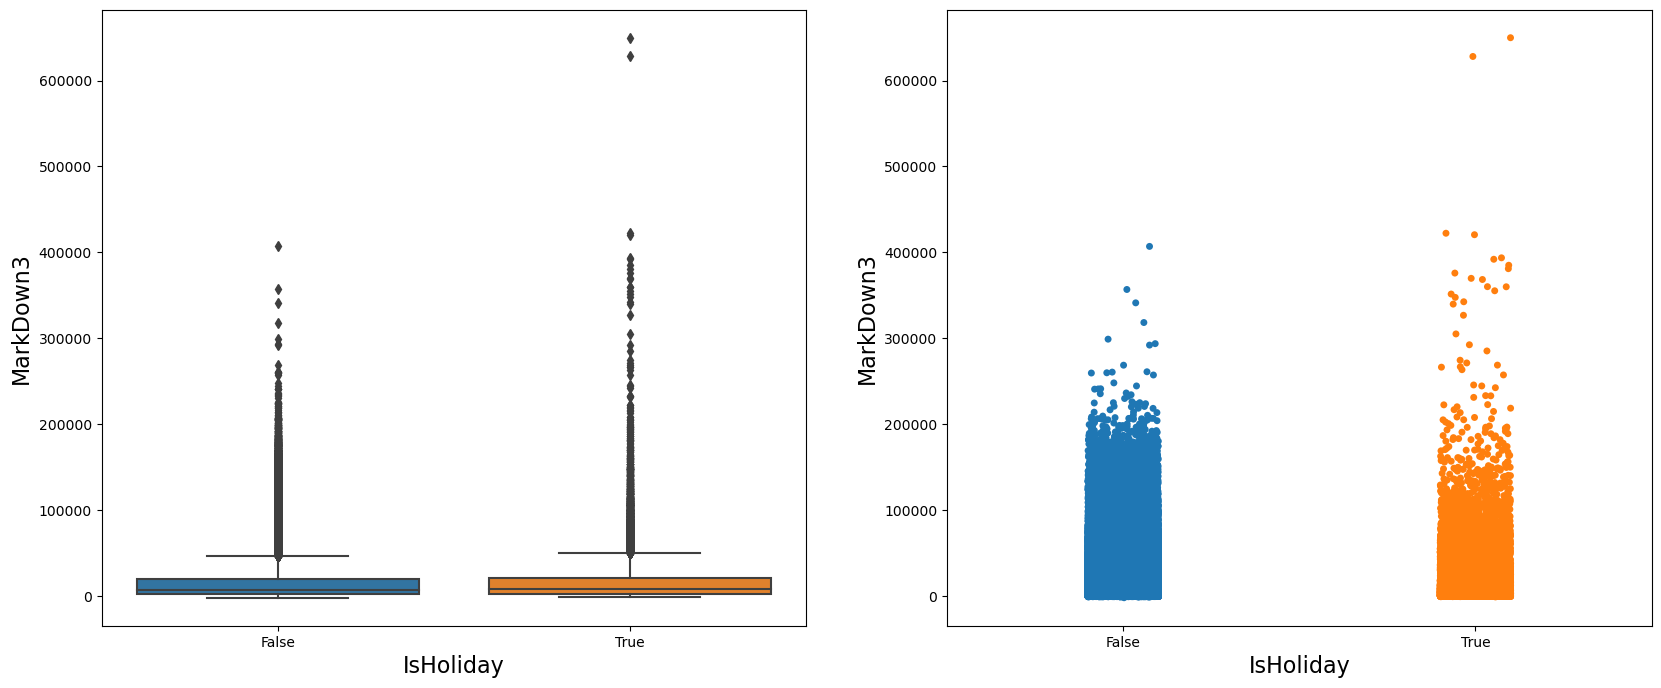

In [81]:
make_discrete_plot3('IsHoliday')

<ipython-input-76-8d430f8f844e>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


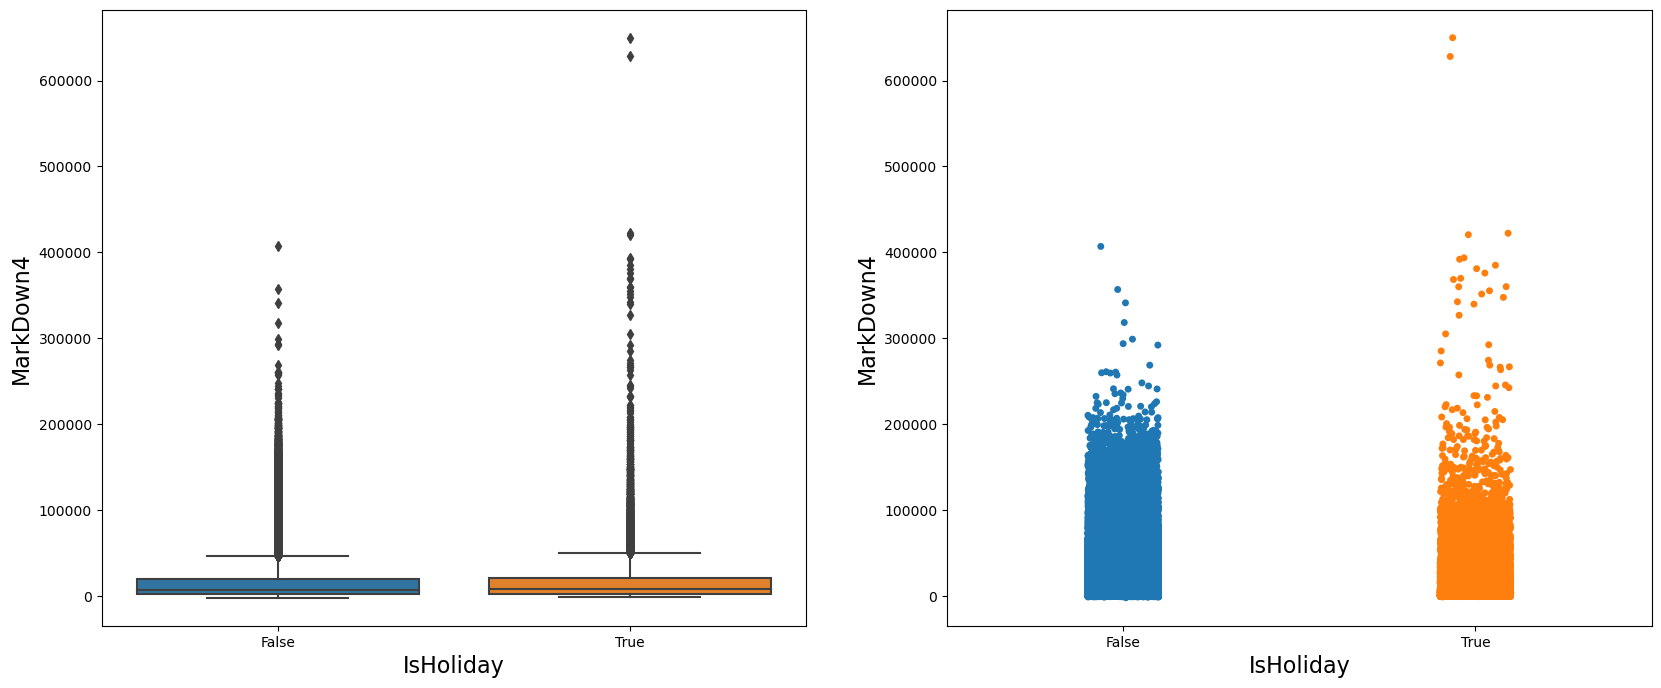

In [82]:
make_discrete_plot4('IsHoliday')

<ipython-input-77-2141ebfe12a9>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


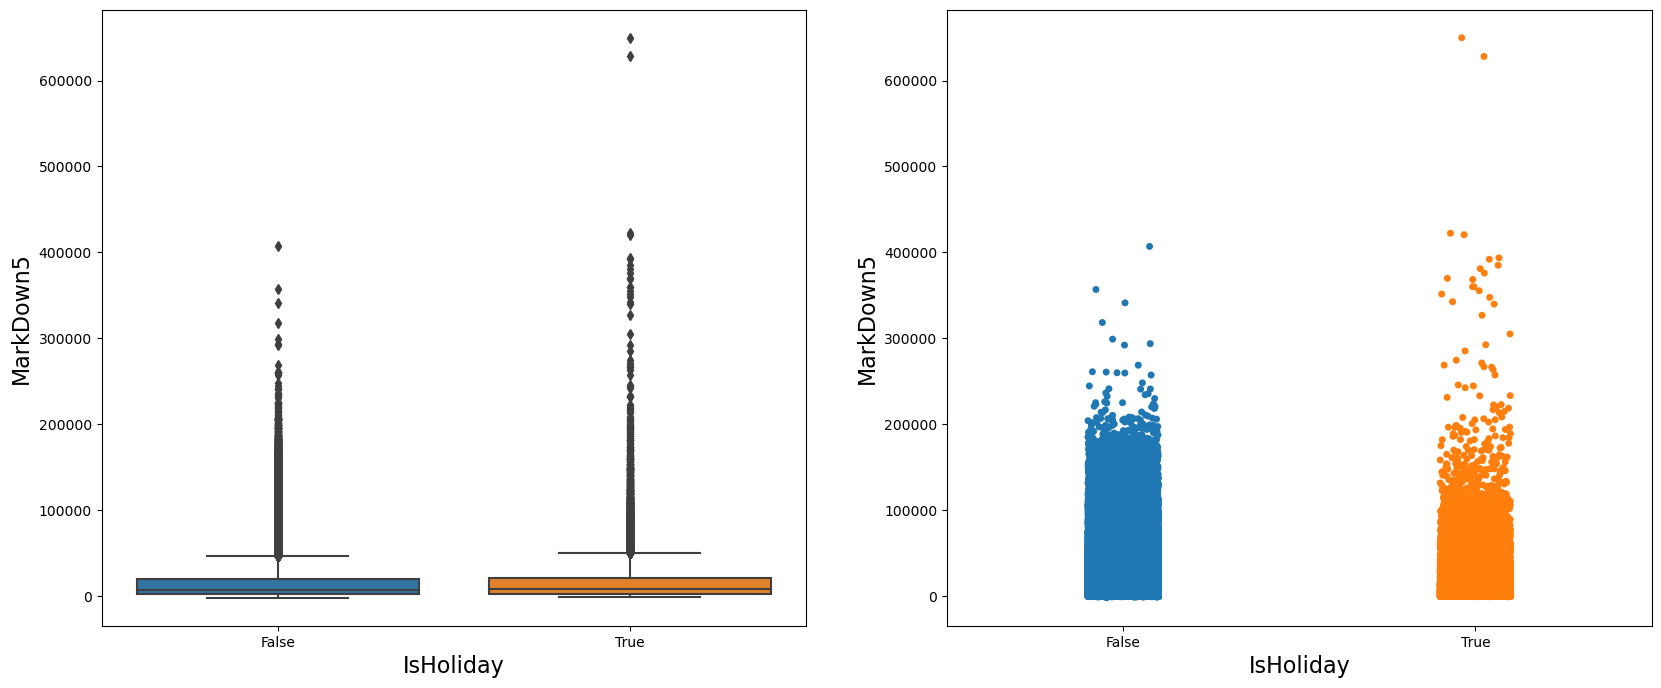

In [83]:
make_discrete_plot5('IsHoliday')

<ipython-input-72-eec8e6dd2419>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


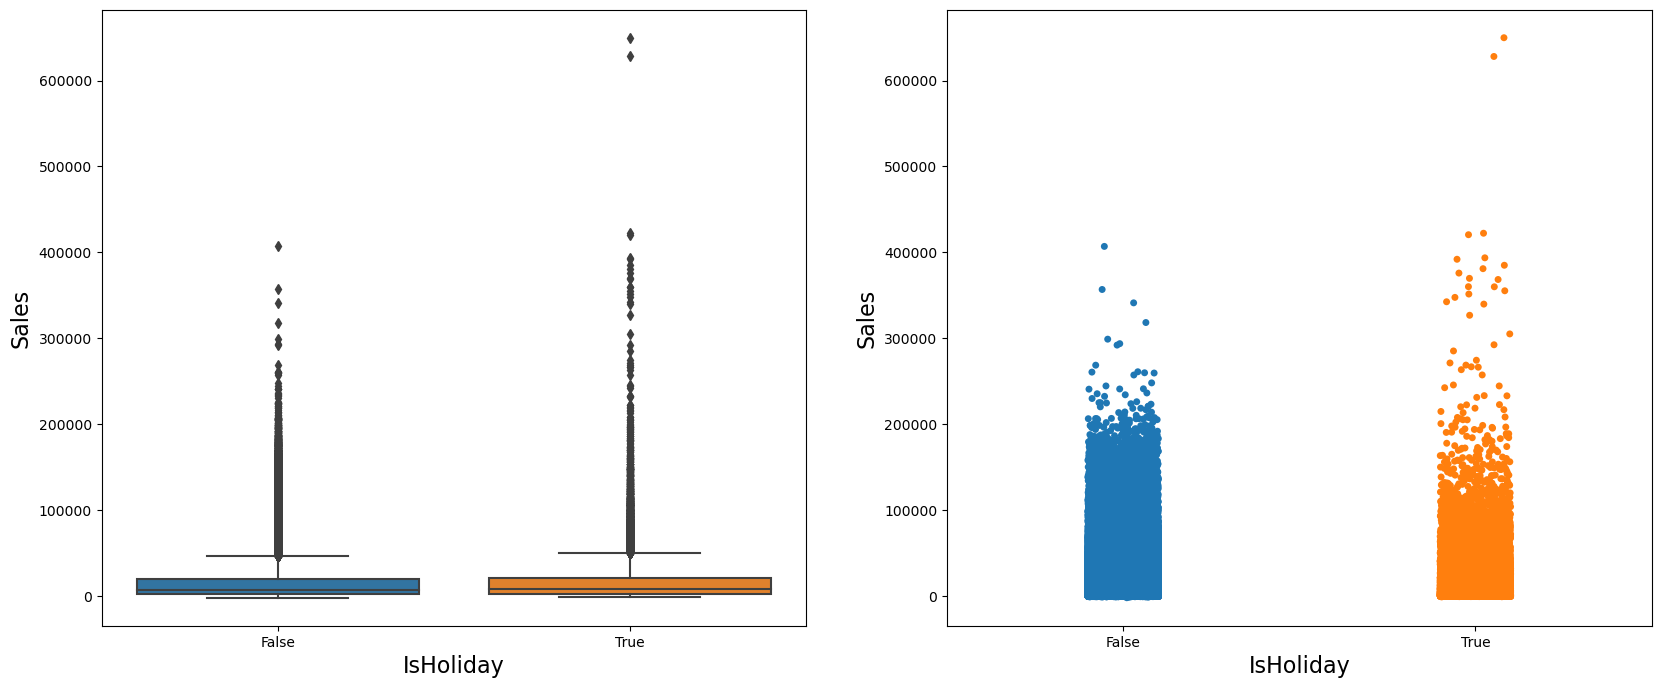

In [84]:
make_discrete_plot('IsHoliday')

<ipython-input-72-eec8e6dd2419>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


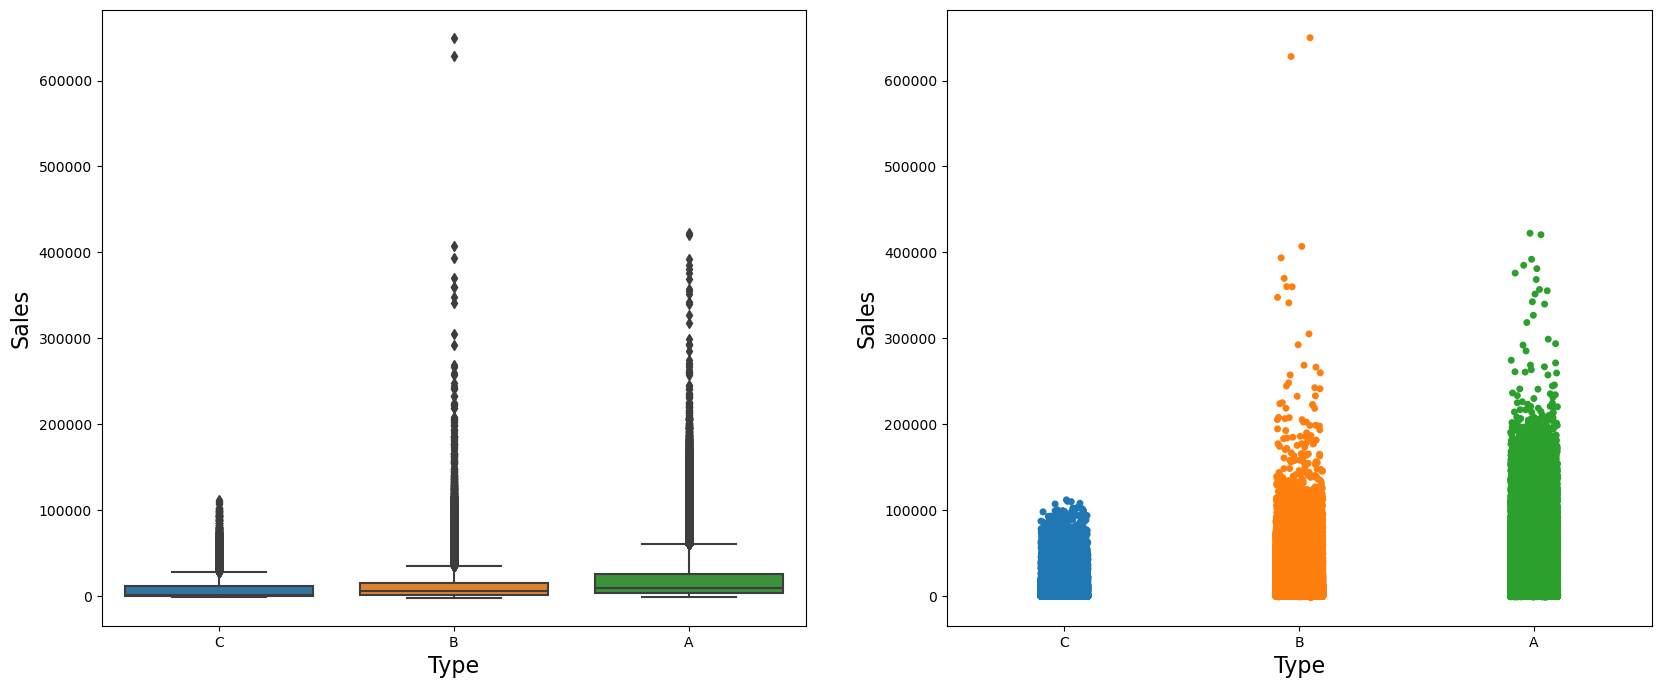

In [86]:
make_discrete_plot('Type')

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-92-74041f77899b>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


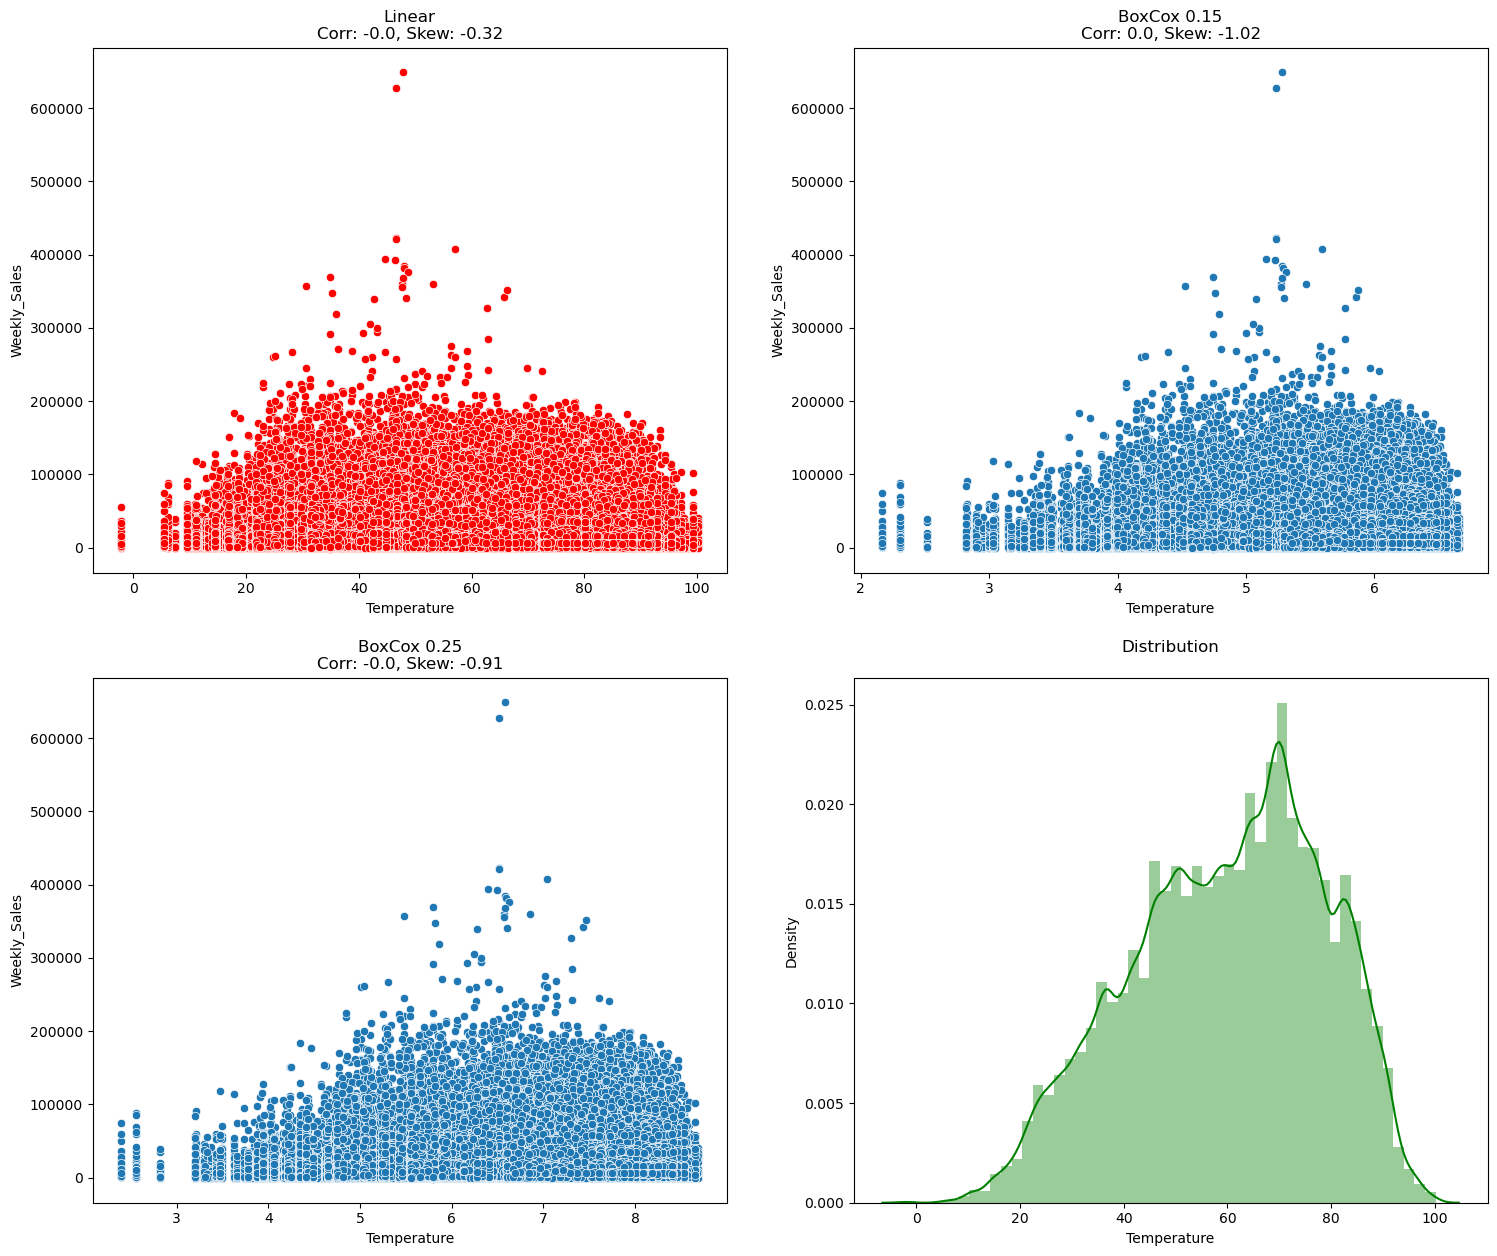

In [93]:
make_continuous_plot('Temperature')

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-92-74041f77899b>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


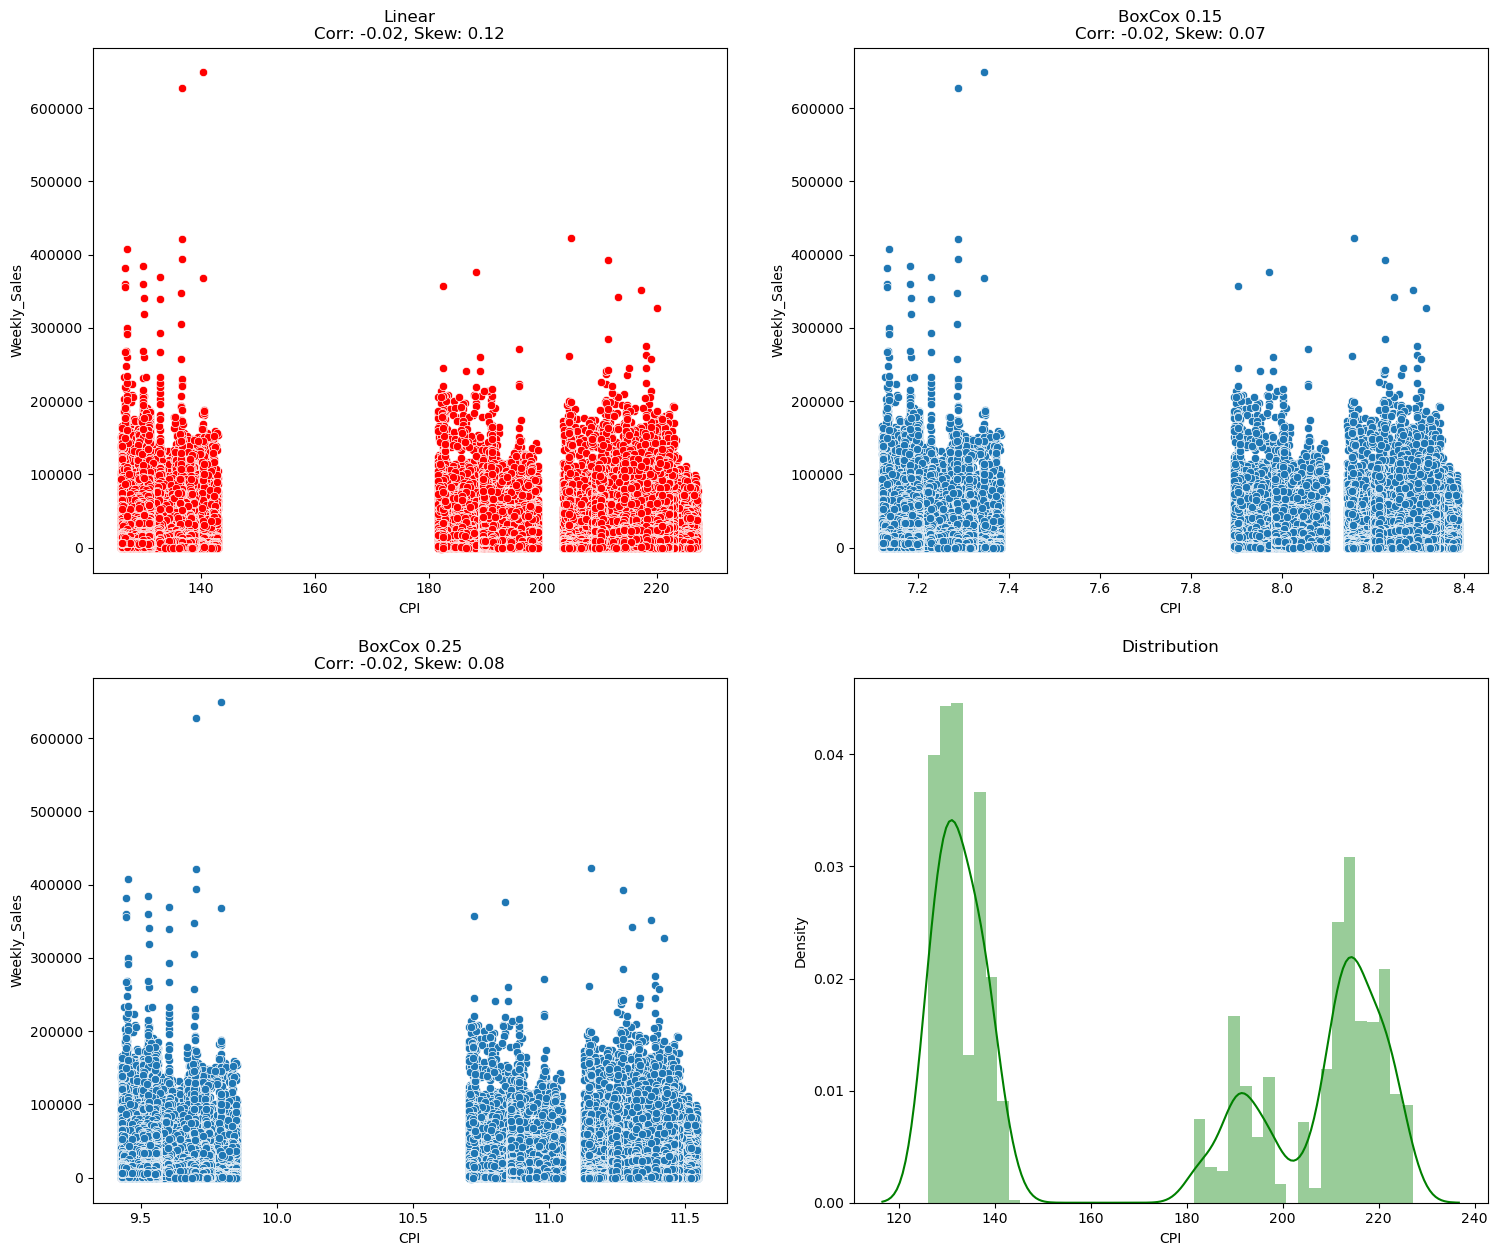

In [94]:
make_continuous_plot('CPI')

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-92-74041f77899b>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


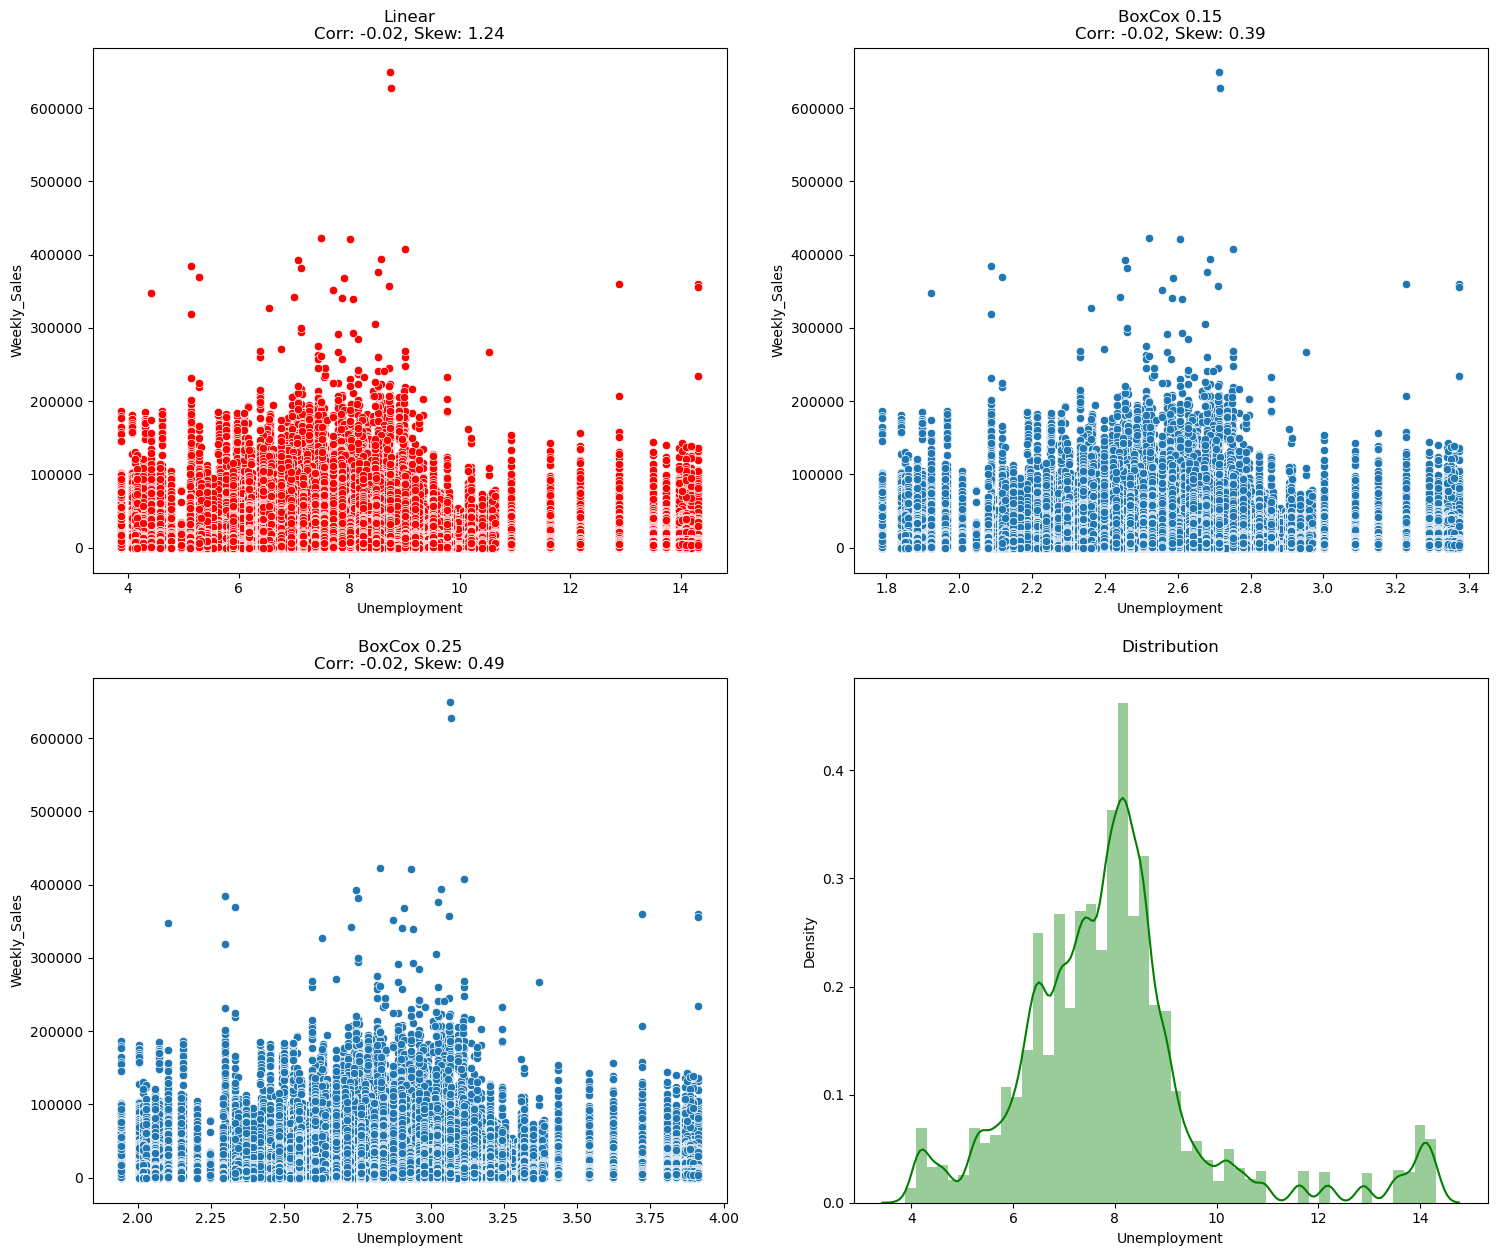

In [95]:
make_continuous_plot('Unemployment')

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-92-74041f77899b>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


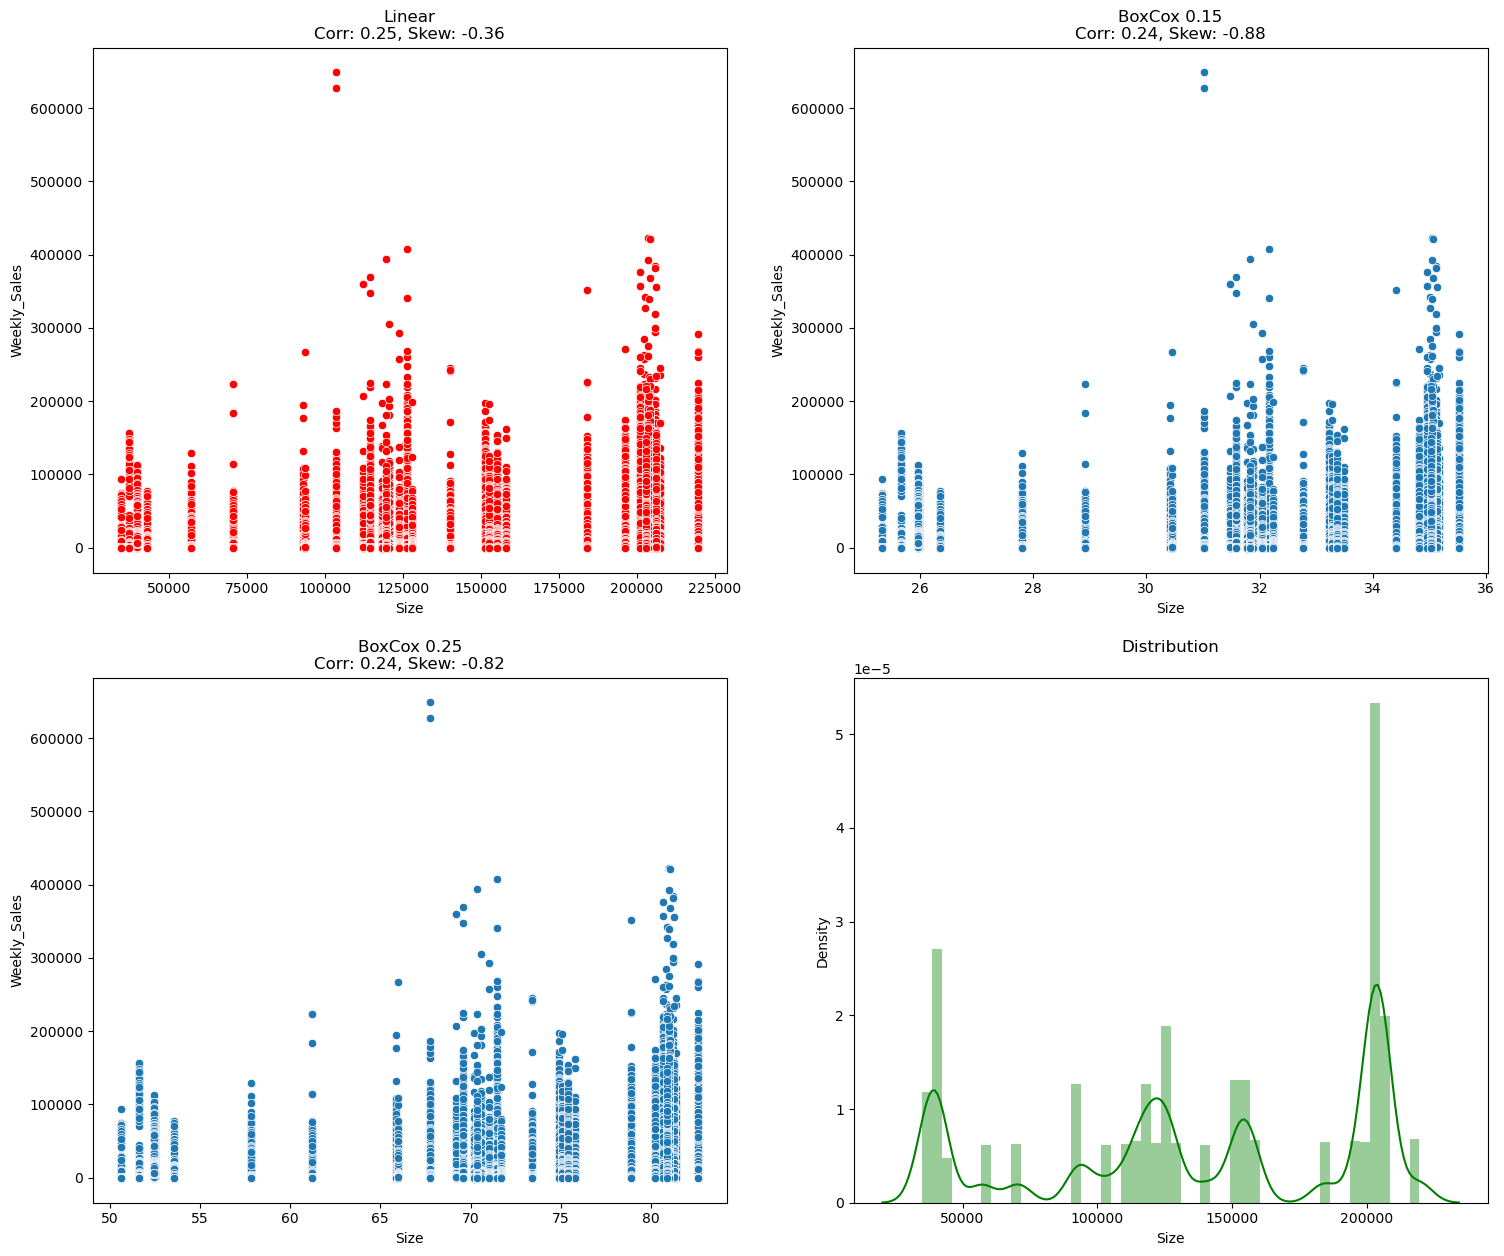

In [96]:
make_continuous_plot('Size')

In [68]:
alldataset = alldataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

In [71]:
df = alldataset.pop('Weekly_Sales')
alldataset['Weekly_Sales'] = df

In [74]:
input_cols, target_col = alldataset.columns[:-1], alldataset.columns[-1]
inputs_df, targets = alldataset[input_cols].copy(), alldataset[target_col].copy()

In [76]:
numeric_cols = alldataset[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = alldataset[input_cols].select_dtypes(include='object').columns.tolist()

In [77]:
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [78]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

In [79]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dtree = DecisionTreeRegressor(random_state=0)

In [83]:
%%time
dtree.fit(train_inputs, train_targets)

CPU times: user 1.15 s, sys: 36.1 ms, total: 1.19 s
Wall time: 1.19 s


DecisionTreeRegressor(random_state=0)

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
tree_train_preds = dtree.predict(train_inputs)

In [86]:
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)

In [87]:
tree_val_preds = dtree.predict(val_inputs)

In [88]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)

In [89]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 1025.2518287826779, Validation RMSE: 6732.395747219457


In [90]:
dtree_importances = dtree.feature_importances_

In [91]:
dtree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': dtree_importances
}).sort_values('importance', ascending=False)

In [92]:
dtree_importance_df

,feature,importance
1,Dept,0.612228
2,Size,0.229626
0,Store,0.065341
10,Week,0.037098
5,MarkDown3,0.015410
9,Month,0.009416
12,Type_B,0.009054
8,Year,0.006448
11,Type_A,0.003531
4,MarkDown2,0.003032


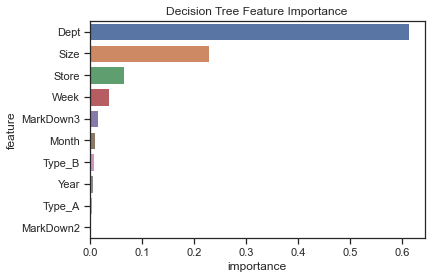

In [93]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=dtree_importance_df.head(10), x='importance', y='feature');

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf1 = RandomForestRegressor(random_state=0, n_estimators=10)

In [96]:
%%time
rf1.fit(train_inputs, train_targets)

CPU times: user 7.32 s, sys: 125 ms, total: 7.45 s
Wall time: 7.46 s


RandomForestRegressor(n_estimators=10, random_state=0)

In [97]:
rf1_train_preds = rf1.predict(train_inputs)

In [98]:
rf1_train_rmse = mean_squared_error(train_targets, rf1_train_preds, squared=False)

In [99]:
rf1_val_preds = rf1.predict(val_inputs)

In [100]:
rf1_val_rmse = mean_squared_error(val_targets, rf1_val_preds, squared=False)

In [101]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 2270.523256198775, Validation RMSE: 5373.246934268922


In [102]:
def test_params(**params):
    model = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=16, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [103]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [104]:
test_params()

(2142.95650476704, 5313.184612625235)

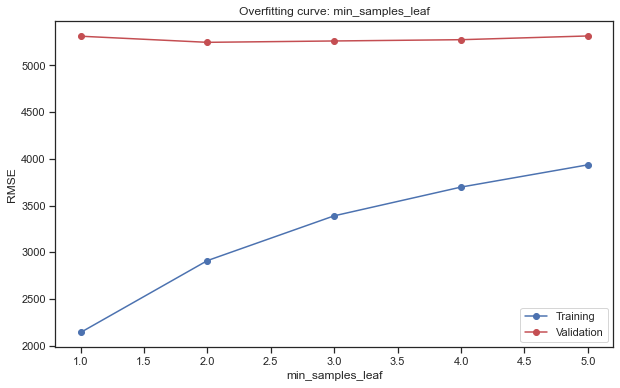

In [105]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5])

In [106]:
test_params(min_samples_leaf = 5)

(3936.7560213693932, 5315.811630617029)

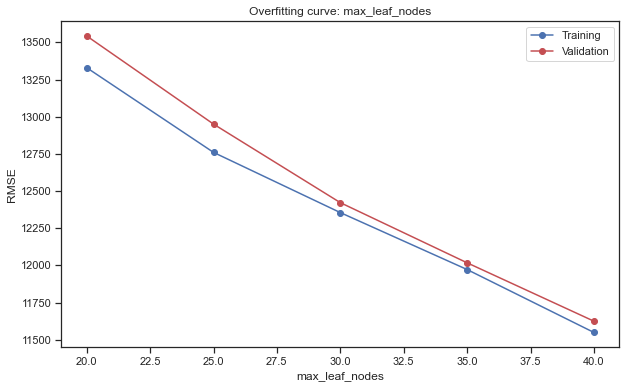

In [107]:
test_param_and_plot('max_leaf_nodes', [20, 25, 30, 35, 40])

In [108]:
test_params(max_leaf_nodes = 35)

(11971.705345760054, 12017.010144501342)

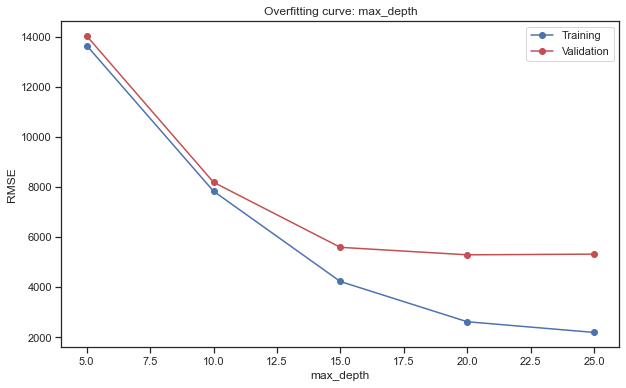

In [109]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25])

In [110]:
test_params(max_depth = 10)

(7840.826465815866, 8196.728188185385)

In [112]:
rf2 = RandomForestRegressor(n_estimators=16, random_state = 0, min_samples_leaf = 1)

In [113]:
rf2.fit(train_inputs, train_targets)

RandomForestRegressor(n_estimators=16, random_state=0)

In [114]:
rf2_train_preds = rf2.predict(train_inputs)

In [115]:
rf2_train_rmse = mean_squared_error(train_targets, rf2_train_preds, squared=False)

In [116]:
rf2_val_preds = rf2.predict(val_inputs)

In [118]:
rf2_val_rmse = mean_squared_error(val_targets, rf2_val_preds, squared=False)

In [119]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 2142.95650476704, Validation RMSE: 5313.184612625235


In [120]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [121]:
rf2_importance_df

,feature,importance
1,Dept,0.613290
2,Size,0.230090
0,Store,0.063039
10,Week,0.038515
5,MarkDown3,0.014258
9,Month,0.009451
12,Type_B,0.009449
8,Year,0.006205
7,MarkDown5,0.003367
6,MarkDown4,0.003148


<AxesSubplot:xlabel='importance', ylabel='feature'>

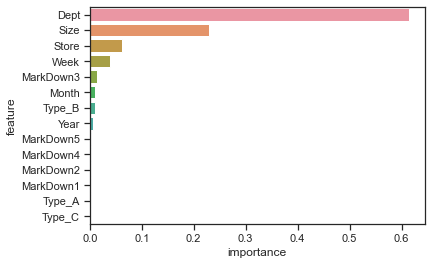

In [122]:
sns.barplot(data=rf2_importance_df, x='importance', y='feature')

In [123]:
test_dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,27,24,18-02-2011,1953.88,False,B,128107,38.42,3.245,NaN,NaN,NaN,NaN,NaN,206.369470,7.343
1,10,3,17-08-2012,31341.76,False,A,155078,81.21,3.571,3224.14,21.02,4.26,1066.29,5044.43,225.605080,5.401
2,7,11,09-09-2011,6147.36,True,B,34875,79.04,3.546,NaN,NaN,NaN,NaN,NaN,216.422682,6.529
3,4,44,19-03-2010,6092.27,False,A,202307,54.52,2.720,NaN,NaN,NaN,NaN,NaN,210.873332,8.324
4,12,50,08-10-2010,4170.00,False,B,126512,77.04,2.924,NaN,NaN,NaN,NaN,NaN,126.279167,9.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124441,7,71,27-08-2010,199.50,False,B,34875,87.05,2.619,NaN,NaN,NaN,NaN,NaN,212.123908,6.496
124442,27,38,23-07-2010,48408.53,False,B,128107,75.37,2.771,NaN,NaN,NaN,NaN,NaN,204.481219,7.527
124443,5,34,01-06-2012,6342.20,False,B,37392,81.55,3.501,2664.55,10.00,220.03,618.49,1940.77,225.251831,6.664
124444,25,98,04-03-2011,3.65,False,B,114533,20.67,3.437,NaN,NaN,NaN,NaN,NaN,133.614143,5.114


In [127]:
test_dataset.isnull().mean() * 100

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [126]:
test_dataset['MarkDown1'] = test_dataset['MarkDown1'].fillna(0)
test_dataset['MarkDown2'] = test_dataset['MarkDown2'].fillna(0)
test_dataset['MarkDown3'] = test_dataset['MarkDown3'].fillna(0)
test_dataset['MarkDown4'] = test_dataset['MarkDown4'].fillna(0)
test_dataset['MarkDown5'] = test_dataset['MarkDown5'].fillna(0)

In [128]:
test_dataset['Year'] = pd.to_datetime(test_dataset['Date']).dt.year
test_dataset['Month'] = pd.to_datetime(test_dataset['Date']).dt.month
test_dataset['Week'] = pd.to_datetime(test_dataset['Date']).dt.isocalendar().week

In [129]:
test_dataset = test_dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

In [130]:
test_dataset

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week
0,27,24,1953.88,False,B,128107,0.00,0.00,0.00,0.00,0.00,2011,2,7
1,10,3,31341.76,False,A,155078,3224.14,21.02,4.26,1066.29,5044.43,2012,8,33
2,7,11,6147.36,True,B,34875,0.00,0.00,0.00,0.00,0.00,2011,9,36
3,4,44,6092.27,False,A,202307,0.00,0.00,0.00,0.00,0.00,2010,3,11
4,12,50,4170.00,False,B,126512,0.00,0.00,0.00,0.00,0.00,2010,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124441,7,71,199.50,False,B,34875,0.00,0.00,0.00,0.00,0.00,2010,8,34
124442,27,38,48408.53,False,B,128107,0.00,0.00,0.00,0.00,0.00,2010,7,29
124443,5,34,6342.20,False,B,37392,2664.55,10.00,220.03,618.49,1940.77,2012,1,1
124444,25,98,3.65,False,B,114533,0.00,0.00,0.00,0.00,0.00,2011,4,13


In [131]:
test_dataset[numeric_cols] = imputer.transform(test_dataset[numeric_cols])
test_dataset[numeric_cols] = scaler.transform(test_dataset[numeric_cols])
test_dataset[encoded_cols] = encoder.transform(test_dataset[categorical_cols])

In [132]:
test_inputs = test_dataset[numeric_cols + encoded_cols]

In [134]:
test_preds = rf2.predict(test_inputs)

In [136]:
test_preds

array([3.57630250e+03, 4.03719481e+04, 6.08809000e+03, ...,
       4.70784062e+03, 3.81231250e+01, 1.01068125e+02])

In [137]:
test_dataset['predicted values'] = test_preds

In [138]:
test_dataset.to_csv(r'testing.csv', index = False)